In [549]:
import tensorflow as tf
import tensorflow_datasets as tdfs
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=4)

In [550]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

feature_names = column_names[:-1]
label_name = column_names[-1]

learning_rate = 0.01
epoches = 300

In [551]:
ds, info = tdfs.load('iris', split='train', with_info=True)

df = tdfs.as_dataframe(ds)
df[feature_names] = pd.DataFrame(df['features'].tolist(), index= df.index)
df[[label_name]] = df[['label']]

df = df.drop('features', axis=1).drop('label', axis=1)
features, labels = tf.convert_to_tensor(df[feature_names]), tf.convert_to_tensor(df[label_name])

df.head(), features, labels

(   sepal_length  sepal_width  petal_length  petal_width  species
 0           5.1          3.4           1.5          0.2        0
 1           7.7          3.0           6.1          2.3        2
 2           5.7          2.8           4.5          1.3        1
 3           6.8          3.2           5.9          2.3        2
 4           5.2          3.4           1.4          0.2        0,
 <tf.Tensor: shape=(150, 4), dtype=float32, numpy=
 array([[5.1, 3.4, 1.5, 0.2],
        [7.7, 3. , 6.1, 2.3],
        [5.7, 2.8, 4.5, 1.3],
        [6.8, 3.2, 5.9, 2.3],
        [5.2, 3.4, 1.4, 0.2],
        [5.6, 2.9, 3.6, 1.3],
        [5.5, 2.6, 4.4, 1.2],
        [5.5, 2.4, 3.7, 1. ],
        [4.6, 3.4, 1.4, 0.3],
        [7.7, 2.8, 6.7, 2. ],
        [7. , 3.2, 4.7, 1.4],
        [4.6, 3.2, 1.4, 0.2],
        [6.5, 3. , 5.2, 2. ],
        [5.5, 4.2, 1.4, 0.2],
        [5.4, 3.9, 1.3, 0.4],
        [5. , 3.5, 1.3, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [4.8, 3. , 1.4, 0.1],
        [6.5

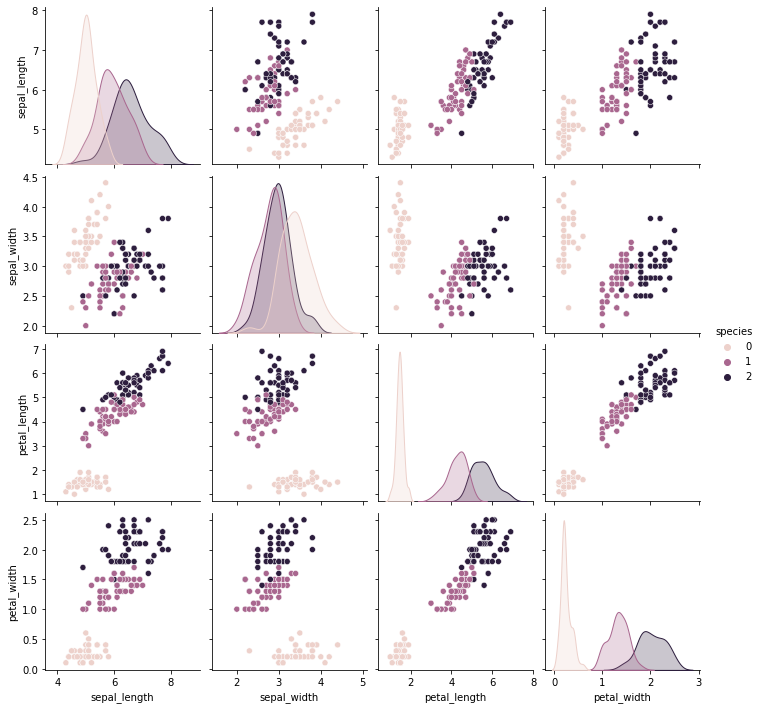

In [552]:
sns.pairplot(df, hue='species')

In [553]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(3)
])

In [554]:
predictions = model(features)
predictions[:5], tf.nn.softmax(predictions[:5])

(<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
 array([[ 0.4777, -1.0137,  3.9823],
        [ 0.126 , -1.3102,  6.2402],
        [ 0.1561, -1.2383,  4.8718],
        [-0.0167, -1.2009,  5.7371],
        [ 0.5023, -1.0056,  4.0018]], dtype=float32)>,
 <tf.Tensor: shape=(5, 3), dtype=float32, numpy=
 array([[2.8991e-02, 6.5246e-03, 9.6448e-01],
        [2.2051e-03, 5.2445e-04, 9.9727e-01],
        [8.8547e-03, 2.1958e-03, 9.8895e-01],
        [3.1577e-03, 9.6619e-04, 9.9588e-01],
        [2.9136e-02, 6.4501e-03, 9.6441e-01]], dtype=float32)>)

In [555]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [556]:
%%time
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
history = model.fit(features, labels, epochs=epoches, batch_size=32)

Epoch 1/300
5/5 [==============================] - 0s 11ms/step - loss: 2.2629 - accuracy: 0.3333
Epoch 2/300
5/5 [==============================] - 0s 6ms/step - loss: 1.1820 - accuracy: 0.3200
Epoch 3/300
5/5 [==============================] - 0s 6ms/step - loss: 1.0570 - accuracy: 0.2467


2021-12-24 16:11:06.516291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 4/300
5/5 [==============================] - 0s 6ms/step - loss: 0.9809 - accuracy: 0.4067
Epoch 5/300
5/5 [==============================] - 0s 6ms/step - loss: 0.9623 - accuracy: 0.4267
Epoch 6/300
5/5 [==============================] - 0s 6ms/step - loss: 0.9452 - accuracy: 0.6267
Epoch 7/300
5/5 [==============================] - 0s 6ms/step - loss: 0.9316 - accuracy: 0.6600
Epoch 8/300
5/5 [==============================] - 0s 7ms/step - loss: 0.9229 - accuracy: 0.6667
Epoch 9/300
5/5 [==============================] - 0s 7ms/step - loss: 0.9057 - accuracy: 0.7133
Epoch 10/300
5/5 [==============================] - 0s 6ms/step - loss: 0.8825 - accuracy: 0.6600
Epoch 11/300
5/5 [==============================] - 0s 7ms/step - loss: 0.8685 - accuracy: 0.6667
Epoch 12/300
5/5 [==============================] - 0s 6ms/step - loss: 0.8531 - accuracy: 0.6533
Epoch 13/300
5/5 [==============================] - 0s 6ms/step - loss: 0.8294 - accuracy: 0.6667
Epoch 14/300
5/5 [========

tf.Tensor([0 2 1 2 0 1 1 1 0 2 1 0 2 0 0 0 0 0 2 2 2 1 2 0 2 0 2 1 1 1], shape=(30,), dtype=int64)
tf.Tensor([0 2 1 2 0 1 1 1 0 2 1 0 2 0 0 0 0 0 2 2 2 2 2 0 2 0 2 1 1 1], shape=(30,), dtype=int64)


2021-12-24 16:11:17.816340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


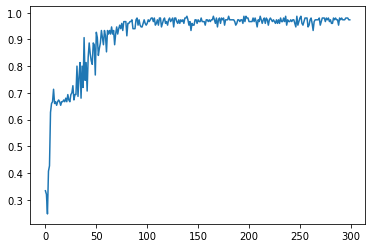

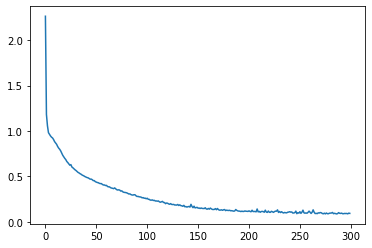

In [557]:
x_test = features[:30]
y_test = labels[:30]

pred = model.predict(x_test)
print(tf.argmax(pred, axis=1))
print(y_test)

plt.plot(history.history['accuracy'])
plt.show()
plt.plot(history.history['loss'])
plt.show()